# Predict Website Conversions - Notebook 1 Data Exploration

[Worked Example](https://bharatss.medium.com/predicting-visitor-to-customer-conversion-for-an-online-store-via-supervised-machine-learning-d5943b4a0e04)

Problem Statement:

Online jewellery shop - predict whether a visitor to the website will purchase or convert

Customers have a range of features or a profile in terms of location, whether they make apurchase, how long they spent on the site, whether they are new visitors or not:

* Customer id
* Number of administrative pages visited
* How long spent on administrative pages
* Number of information pages visited
* How long spent on informational pages
* Number of product pages visited
* How long spent on product pages
* Bounce rate - percentage of visitors who navigate away after viewing just one page
* Exit rate
* Number of pages viewed before completing a transaction
* Closeness to a special day such as Valentines Day
* Month (10 months Feb to Dec)
* Operating system used ( 1 to 8)
* Browser used ( 1 to 13)
* Region (1 to 9)
* Traffic type ( 1 to 20)
* Visitor type (returning, new, other)
* Weekend visit by customer ( 0 = False, 1 = True)
* Revenue - whether the visit resulted in a sale ( 0 = False, 1 = True)

Anaconda Environment - Base

## Import Dataset and Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations

In [45]:
df_train = pd.read_csv("C:/Users/imoge/Projects/Datasets/CustomerPredictionTrain.csv")
df_test = pd.read_csv("C:/Users/imoge/Projects/Datasets/CustomerPredictionTest.csv")

In [46]:
print(df_train.shape, df_test.shape)

(8622, 19) (3693, 18)


In [47]:
df_train.head(2)

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,8568,0,0.0,0,0.0,2,0.0,0.2,0.20,0.0,0.0,Aug,1,1,3,1,Returning_Visitor,0,0
1,9207,1,5.0,0,0.0,2,15.2,0.0,0.04,0.0,0.0,Aug,1,1,6,3,Returning_Visitor,0,0


In [48]:
df_test.head(2)

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,913,0,-1.0,0,-1.0,1,-1.0,0.0,0.066667,0.0,0.0,Mar,2,2,7,1,Returning_Visitor,0
1,1863,0,-1.0,0,-1.0,1,-1.0,0.2,0.200000,0.0,0.0,Feb,2,2,4,3,Returning_Visitor,0


## Data Preparation

In [49]:
df_train.Revenue.value_counts()

0    7287
1    1335
Name: Revenue, dtype: int64

In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8622 entries, 0 to 8621
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       8622 non-null   int64  
 1   Administrative           8622 non-null   int64  
 2   Administrative_Duration  8622 non-null   float64
 3   Informational            8622 non-null   int64  
 4   Informational_Duration   8622 non-null   float64
 5   ProductRelated           8622 non-null   int64  
 6   ProductRelated_Duration  8622 non-null   float64
 7   BounceRates              8622 non-null   float64
 8   ExitRates                8622 non-null   float64
 9   PageValues               8622 non-null   float64
 10  SpecialDay               8622 non-null   float64
 11  Month                    8622 non-null   object 
 12  OperatingSystems         8622 non-null   int64  
 13  Browser                  8622 non-null   int64  
 14  Region                  

In [51]:
# Drop any null values
df_train.dropna(inplace = True)

In [52]:
# Check for duplicate IDs
df_train.ID.duplicated().sum()

0

In [53]:
df_train.describe()

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
count,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000
mean,8015.889121,2.343192,83.405240,0.490373,33.159578,31.872419,1192.184366,0.021920,0.042457,5.704339,0.061795,2.124101,2.349803,3.154605,4.117606,0.233820,0.154836
std,2491.319819,3.315094,182.985925,1.258803,138.432097,44.605549,1944.264408,0.047651,0.047784,17.776590,0.199441,0.914461,1.719077,2.409020,4.070923,0.423284,0.361770
min,3701.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5859.250000,0.000000,0.000000,0.000000,0.000000,7.000000,192.462500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000
50%,8016.500000,1.000000,9.000000,0.000000,0.000000,18.000000,606.283333,0.003279,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,10172.750000,4.000000,95.575000,0.000000,0.000000,37.000000,1450.841355,0.017497,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000
max,12330.000000,26.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,360.953384,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000


* There are some values of negative 1 for the minimum duration on administrative, informational and product related pages
* This doesn't make much sense so we will set those to zero

In [54]:
# Set negative durations to zero
df_train["Administrative_Duration"].replace(-1,0, inplace = True)
df_train["Informational_Duration"].replace(-1,0,inplace = True)
df_train["ProductRelated_Duration"].replace(-1,0, inplace = True)

* The Administrative and other types of page visits and durations don't make a lot of sense alone as if someone visits a lot of pages then they will likely spend a longer time
* We will create a new column for each that shows the duration spent per page which combines this information

In [55]:
# Add new feature of duration per page viewed for each type of page
df_train["Administative_Duration/Page"] = df_train["Administrative_Duration"]/df_train["Administrative"]
df_train["Informational_Duration/Page"] = df_train["Informational_Duration"]/df_train["Informational"]
df_train["Product_Duration/Page"] = df_train["ProductRelated_Duration"]/df_train["ProductRelated"]

In [56]:
df_train.describe()

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Administative_Duration/Page,Informational_Duration/Page,Product_Duration/Page
count,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,4628.000000,1784.000000,8601.000000
mean,8015.889121,2.343192,83.407675,0.490373,33.162014,31.872419,1192.186802,0.021920,0.042457,5.704339,0.061795,2.124101,2.349803,3.154605,4.117606,0.233820,0.154836,38.627757,68.615590,38.034126
std,2491.319819,3.315094,182.984808,1.258803,138.431505,44.605549,1944.262914,0.047651,0.047784,17.776590,0.199441,0.914461,1.719077,2.409020,4.070923,0.423284,0.361770,59.425266,129.661774,46.823595
min,3701.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5859.250000,0.000000,0.000000,0.000000,0.000000,7.000000,192.462500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,13.600000,11.575000,17.954545
50%,8016.500000,1.000000,9.000000,0.000000,0.000000,18.000000,606.283333,0.003279,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,23.195193,30.916667,28.958532
75%,10172.750000,4.000000,95.575000,0.000000,0.000000,37.000000,1450.841355,0.017497,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000,43.000000,71.289062,45.113636
max,12330.000000,26.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,360.953384,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,1566.600000,1778.000000,1411.000000


## Exploratory Data Analysis

### Revenue

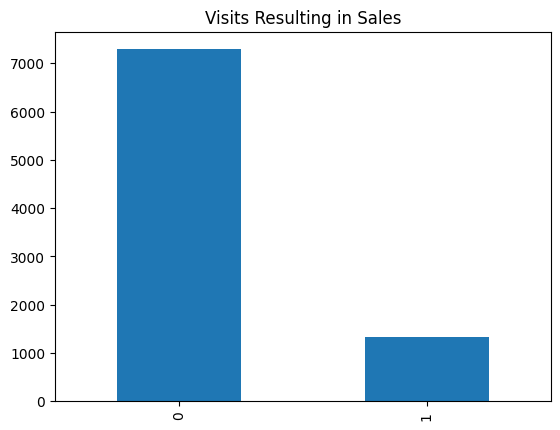

In [57]:
df_train.Revenue.value_counts().plot(kind = "bar",title = "Visits Resulting in Sales");

In [58]:
df_train["Revenue"].value_counts()

0    7287
1    1335
Name: Revenue, dtype: int64

* Conversions to sales are few compared to visitors who don't buy
* Conversion rate is about 13.5%

### Administrative Pages

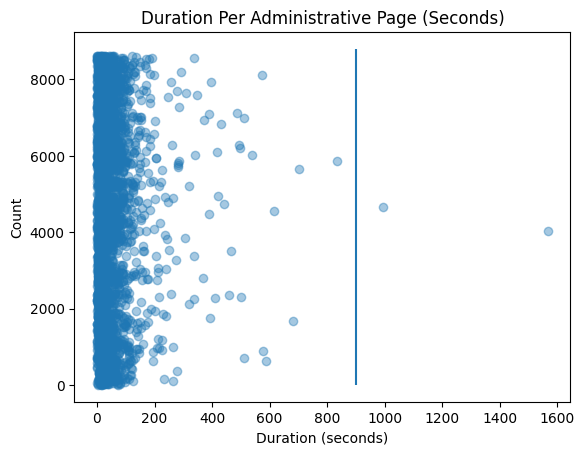

In [60]:
# Check for outliers - administrative duration per page
plt.scatter(y = df_train.index,x = df_train['Administative_Duration/Page'], alpha = 0.4)
plt.title("Duration Per Administrative Page (Seconds)")
plt.xlabel("Duration (seconds)")
plt.vlines(900,0,8800)
plt.ylabel("Count");

In [62]:
# Look at outliers above 15 minutes
df_train[df_train['Administative_Duration/Page']>900]

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Administative_Duration/Page,Informational_Duration/Page,Product_Duration/Page
4042,4051,1,1566.6,0,0.0,34,2256.74954,0.000000,0.00025,0.0,...,2,2,3,2,Returning_Visitor,0,0,1566.6,NaN,66.374986
4662,5424,1,993.0,0,0.0,28,1529.30467,0.001481,0.00915,0.0,...,3,2,4,2,Returning_Visitor,0,0,993.0,NaN,54.618024


* There are a couple of outlier points for users who spend more than 15 minutes per page visited
* We will drop these two

In [191]:
# Drop the outlier values
df_train = df_train[df_train["Informational_Duration"]<1000]

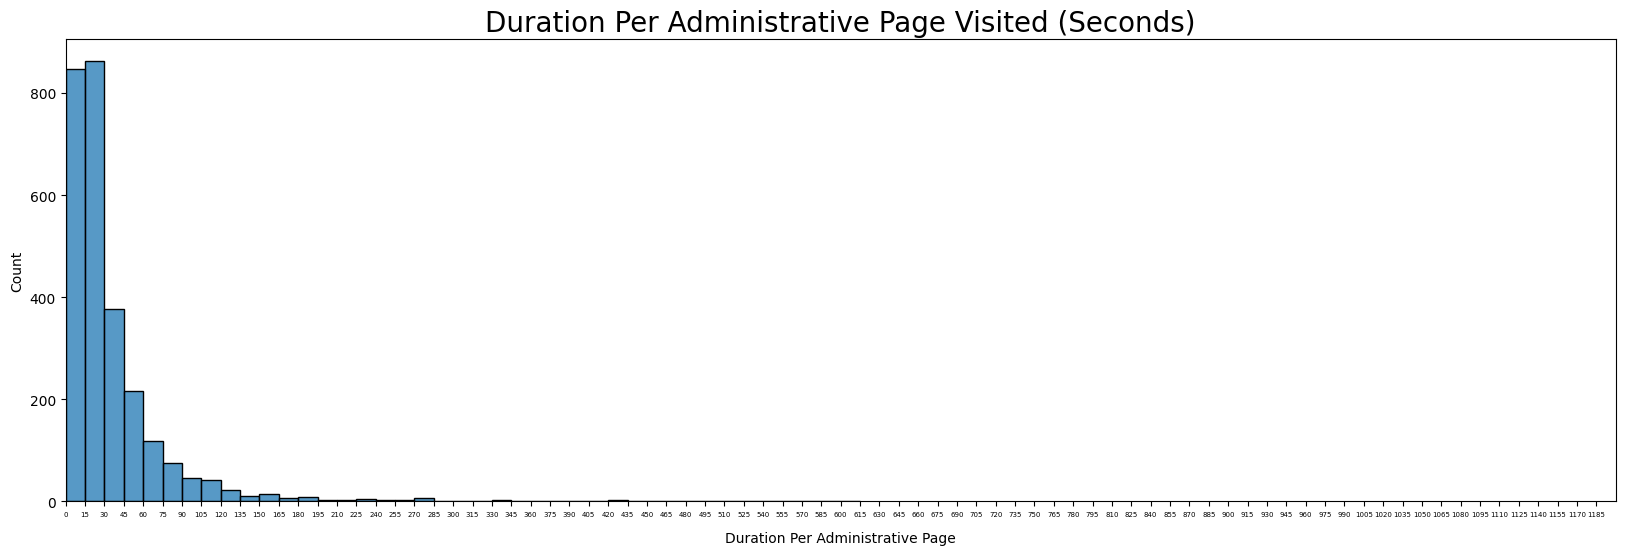

In [192]:
# Plot time spent per page
fig, ax = plt.subplots(figsize = (20,6))
sns.histplot(data = df_train, x = 'Administative_Duration/Page', bins = 30, binwidth = 15)
plt.title("Duration Per Administrative Page Visited (Seconds)", fontsize = 20)
plt.xlabel("Duration Per Administrative Page", labelpad = 10)
plt.xlim(0,1200)
plt.xticks(np.arange(0, 1200,step=15), fontsize = 5);

In [193]:
df_train['Administative_Duration/Page'].skew()

5.175904083049538

* Most visitors who visit an administrative page will spend on average between 15 and 30 seconds on that page

#### Do people who buy spend more time on administrative pages than those who don't?

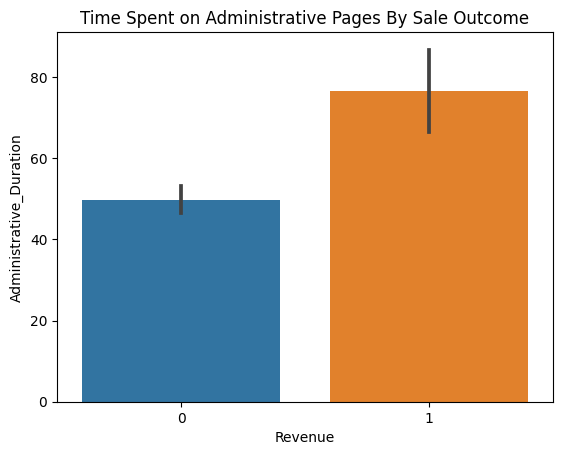

In [194]:
sns.barplot(data = df_train, x = "Revenue", y = 'Administrative_Duration')
plt.title("Time Spent on Administrative Pages By Sale Outcome");

* Purchasers appear to spend more time on administrative pages (minute and a half)
* Non-buyers will spend less than a minute

### Informational Pages

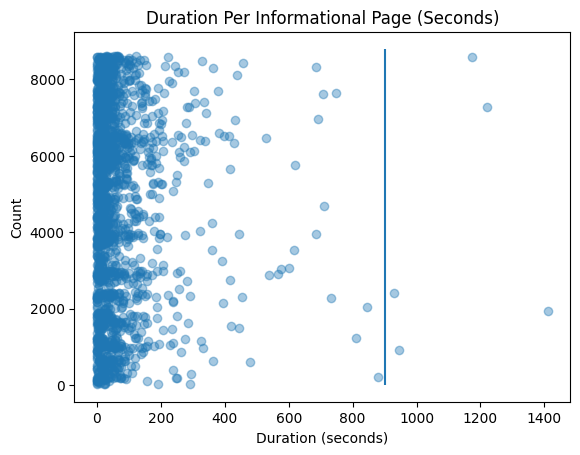

In [70]:
# Check for outliers - informational duration per page
plt.scatter(y = df_train.index,x = df_train['Informational_Duration/Page'], alpha = 0.4)
plt.title("Duration Per Informational Page (Seconds)")
plt.xlabel("Duration (seconds)")
plt.vlines(900,0,8800)
plt.ylabel("Count");

In [71]:
# Look at outliers above 15 minutes
df_train[df_train['Informational_Duration/Page']>900]

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Administative_Duration/Page,Informational_Duration/Page,Product_Duration/Page
914,12107,8,388.791667,1,944.75,17,1464.416667,0.019048,0.034921,0.000000,...,1,1,4,3,Returning_Visitor,0,0,48.598958,944.75,86.142157
1925,9823,0,0.000000,1,1411.00,1,1411.000000,0.000000,0.100000,0.000000,...,2,2,1,2,Returning_Visitor,0,0,NaN,1411.00,1411.000000
2405,9808,0,0.000000,1,929.00,75,4105.666667,0.002632,0.017325,0.000000,...,2,2,3,1,Returning_Visitor,0,0,NaN,929.00,54.742222
7269,8916,0,0.000000,1,1220.00,28,2389.333333,0.016667,0.030833,0.000000,...,2,2,1,3,Returning_Visitor,1,0,NaN,1220.00,85.333333
8595,8317,4,88.000000,1,1174.00,173,6014.398401,0.009531,0.025130,1.539318,...,3,2,1,2,Returning_Visitor,1,1,22.000000,1174.00,34.765309


* There are 5 datapoints where the visitor spent more than 15 minutes per page
* Three of these are well beyond this threshold
* We will drop these

In [72]:
# Drop the outlier values
df_train = df_train[df_train["Informational_Duration"]<1200]

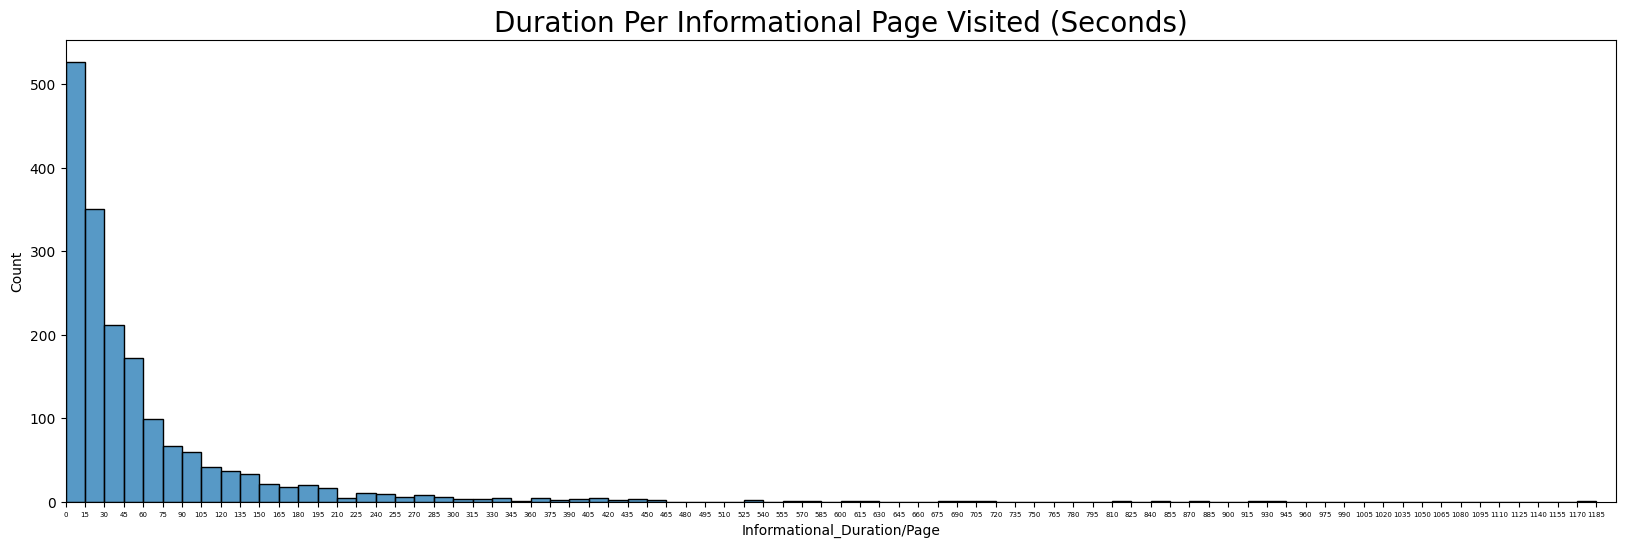

In [73]:
# Plot time spent per page
fig, ax = plt.subplots(figsize = (20,6))
sns.histplot(data = df_train, x = 'Informational_Duration/Page', bins = 60, binwidth = 15)
plt.title("Duration Per Informational Page Visited (Seconds)", fontsize = 20)
plt.xlim(0,1200)
plt.xticks(np.arange(0, 1200,step=15), fontsize = 5);

In [74]:
df_train['Informational_Duration/Page'].skew()

4.650620886056116

* Most visitors who visit an informational page will spend on average between 0 and 15 seconds on that page

#### Do people who buy spend more time on informational pages than those who don't?

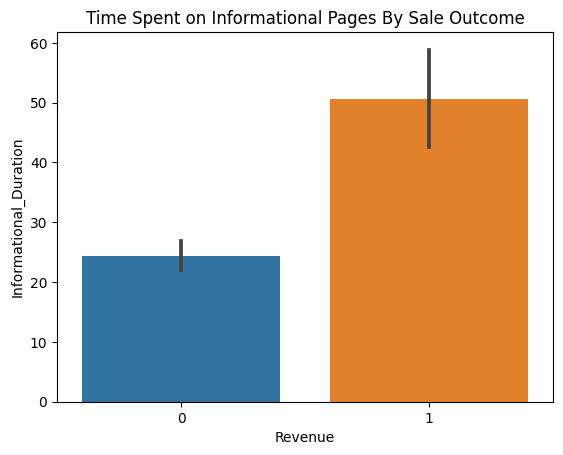

In [75]:
sns.barplot(data = df_train, x = "Revenue", y = 'Informational_Duration')
plt.title("Time Spent on Informational Pages By Sale Outcome");

* Purchasers appear to spend more time on informational pages (50 seconds)
* Non-buyers will spend just under half a minute

### Product Related Pages

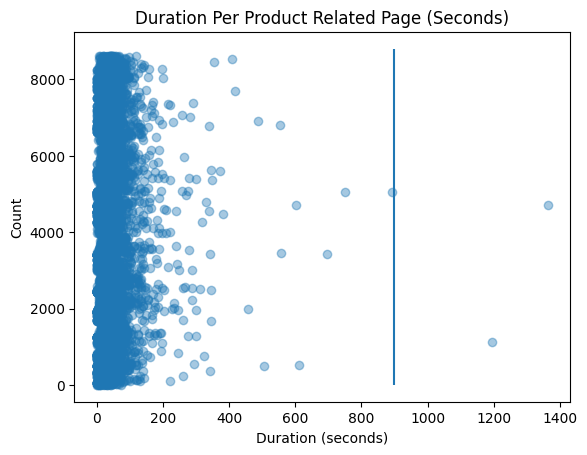

In [76]:
# Check for outliers - informational duration per page
plt.scatter(y = df_train.index,x = df_train['Product_Duration/Page'], alpha = 0.4)
plt.title("Duration Per Product Related Page (Seconds)")
plt.xlabel("Duration (seconds)")
plt.vlines(900,0,8800)
plt.ylabel("Count");

In [77]:
# Look at outliers above 15 minutes
df_train[df_train['Product_Duration/Page']>900]

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Administative_Duration/Page,Informational_Duration/Page,Product_Duration/Page
1130,7575,0,0.0,0,0.0,1,1195.8,0.0,0.0,0.0,...,2,2,7,13,Returning_Visitor,0,0,NaN,NaN,1195.8
4702,4488,0,0.0,0,0.0,1,1364.0,0.0,0.1,0.0,...,3,2,4,4,Returning_Visitor,0,0,NaN,NaN,1364.0


* There are 2 outlier points far from the line

In [195]:
# Drop the outlier values
df_train = df_train[df_train["ProductRelated_Duration"]<1100]

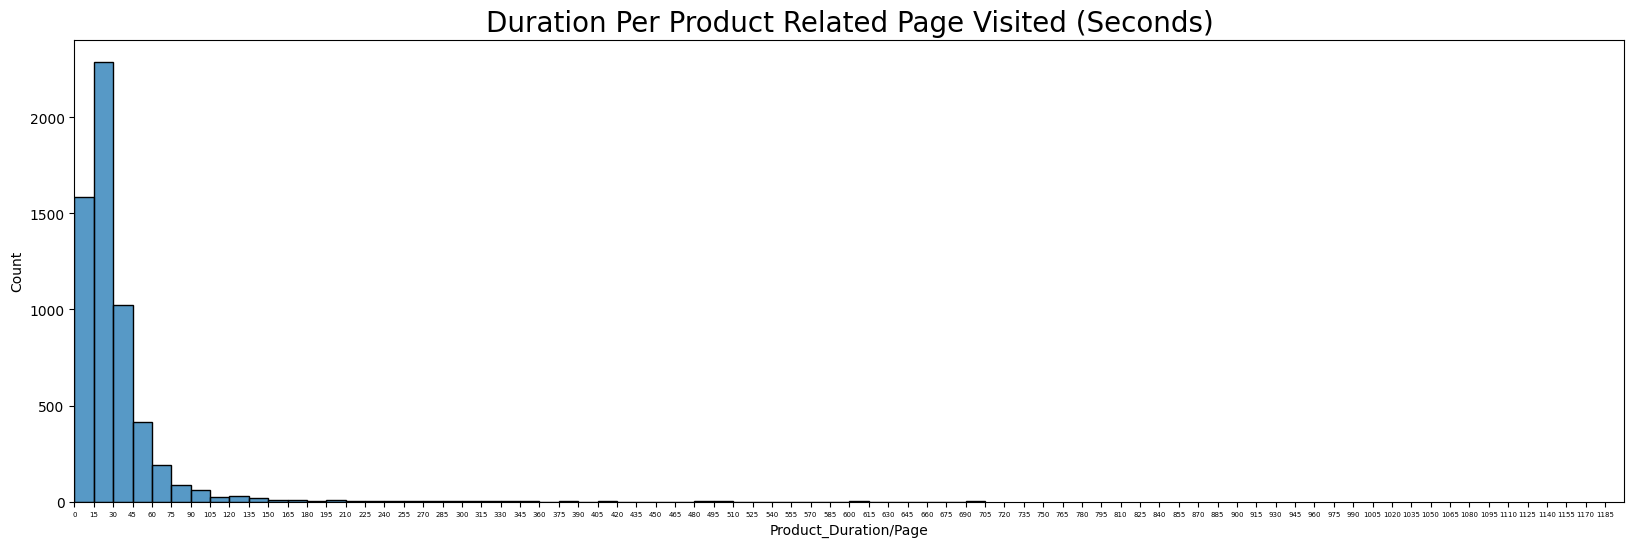

In [196]:
# Plot time spent per page
fig, ax = plt.subplots(figsize = (20,6))
sns.histplot(data = df_train, x = 'Product_Duration/Page', bins = 60, binwidth = 15)
plt.title("Duration Per Product Related Page Visited (Seconds)", fontsize = 20)
plt.xlim(0,1200)
plt.xticks(np.arange(0, 1200,step=15), fontsize = 5);

* Most visitors spend on average 15 to 30 seconds per product related page

#### Do people who buy spend more time on product related pages?

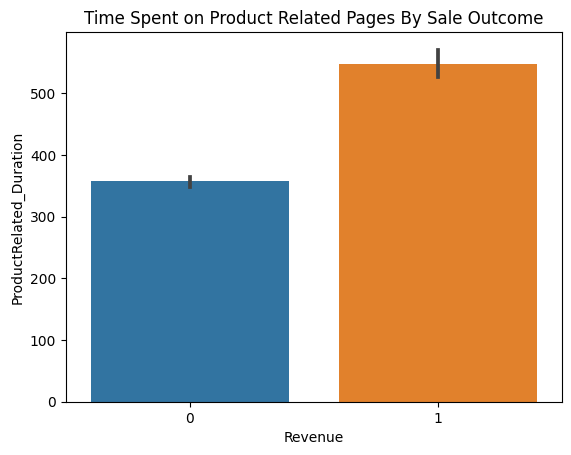

In [197]:
sns.barplot(data = df_train, x = "Revenue", y = 'ProductRelated_Duration')
plt.title("Time Spent on Product Related Pages By Sale Outcome");

* Purchasers appear to spend more time on product related pages (almost 10 minutes)
* Non-buyers will spend less - around 5 to 6 minutes

### Bounce Rates

Single-page sessions divided by all sessions

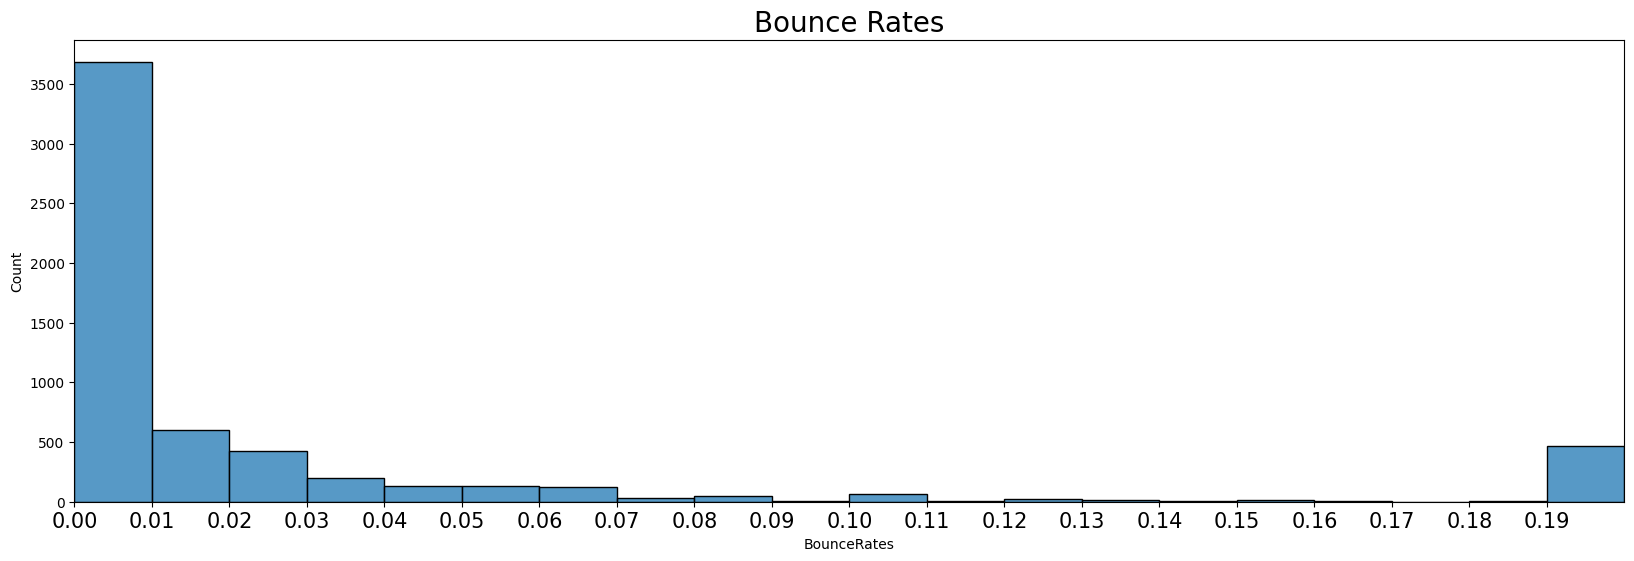

In [155]:
# Plot time spent per page
fig, ax = plt.subplots(figsize = (20,6))
sns.histplot(data = df_train, x = 'BounceRates', bins = 20)
plt.title("Bounce Rates", fontsize = 20)
plt.xlim(0,0.2)
plt.xticks(np.arange(0, 0.2,step=0.01), fontsize = 15);

* Most bounce rates fall in the bar up to 0.01
* The mean value is 0.02 and median is 0
* There are a few clustered up the top of the range at 0.2
* The bounce rate of 0.2 seems to be a cutoff value 

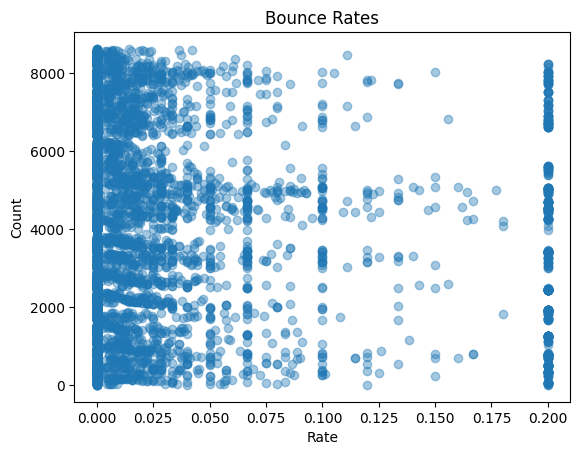

In [159]:
# Check for outliers - informational duration per page
plt.scatter(y = df_train.index,x = df_train['BounceRates'], alpha = 0.4)
plt.title("Bounce Rates")
plt.xlabel("Rate")
plt.ylabel("Count");

In [204]:
# Do any of the users with high bounce rate make a purchase?
df_train[df_train["BounceRates"]==0.2]["Revenue"].value_counts()

0    467
Name: Revenue, dtype: int64

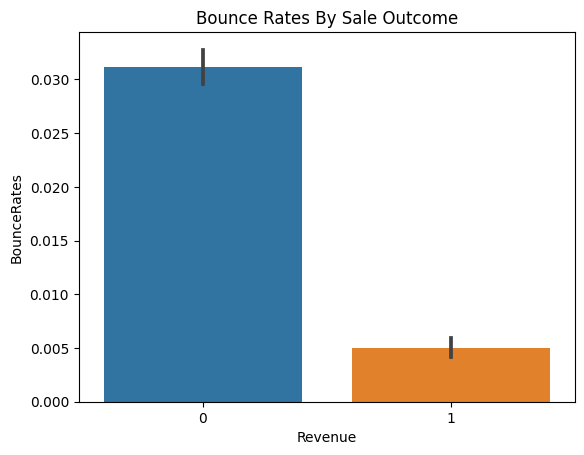

In [108]:
sns.barplot(data = df_train, x = "Revenue", y = 'BounceRates')
plt.title("Bounce Rates By Sale Outcome");

* There seems to be a cutoff point of 0.2 bounce rate with nothing beyond that
* None of the users with a bounce rate of 0.2 (467 of them) make a purchase
* Higher bounce rates are usually associated with people who don't spend on a site
* Visitors who buy have a much lower bounce rate than those who don't

### Exit Rates

Total exits from a page divided by the total amount of visits to that page.

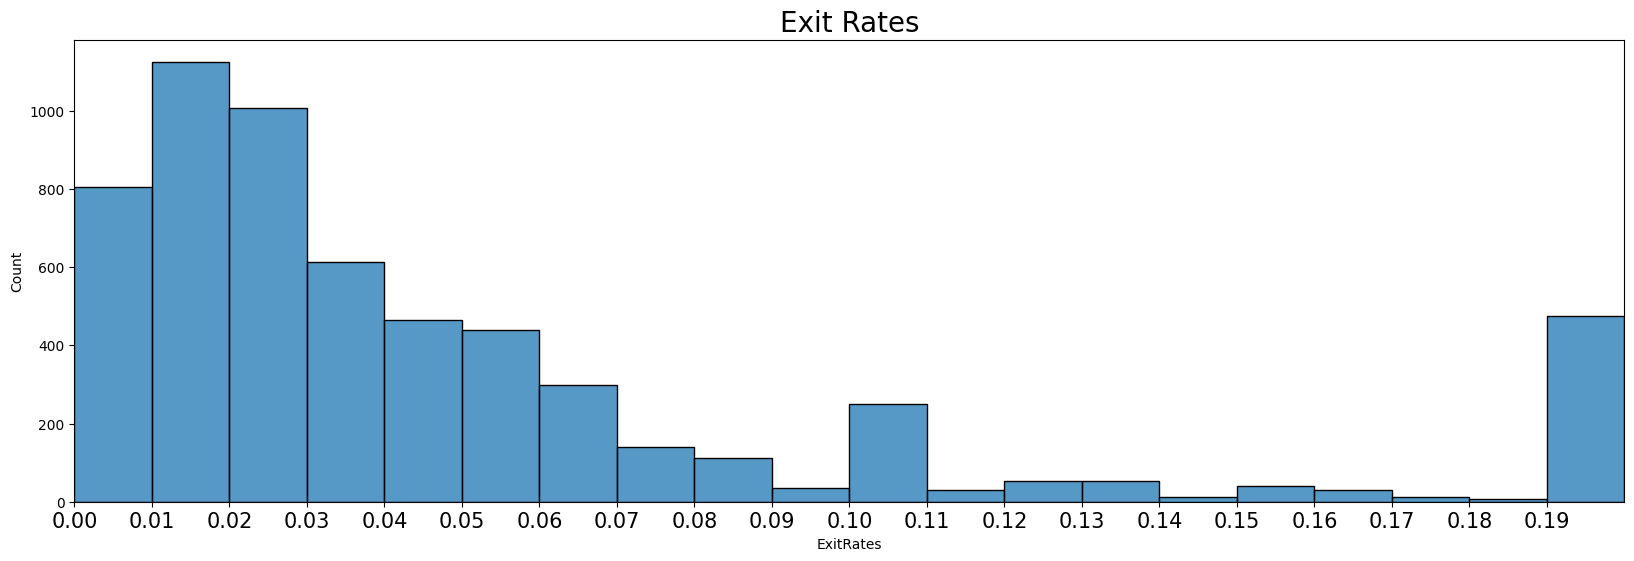

In [161]:
# Plot time spent per page
fig, ax = plt.subplots(figsize = (20,6))
sns.histplot(data = df_train, x = 'ExitRates', bins = 20)
plt.title("Exit Rates", fontsize = 20)
plt.xlim(0,0.2)
plt.xticks(np.arange(0, 0.2,step=0.01), fontsize = 15);

In [162]:
df_train["ExitRates"].skew()

1.7402995065482922

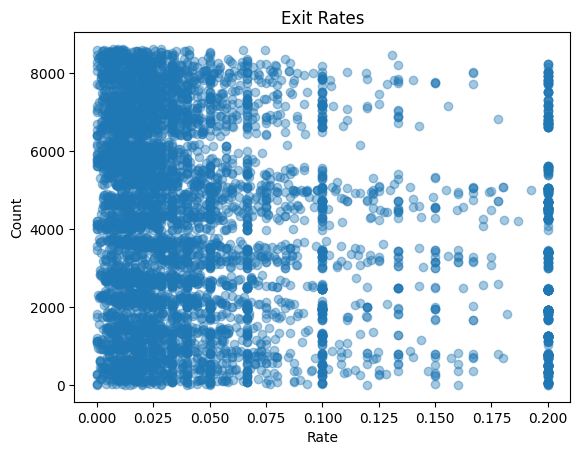

In [164]:
# Check for outliers - informational duration per page
plt.scatter(y = df_train.index,x = df_train['ExitRates'], alpha = 0.4)
plt.title("Exit Rates")
plt.xlabel("Rate")
plt.ylabel("Count");

In [206]:
# Do any of the users with high exit rate make a purchase?
df_train[df_train["ExitRates"]==0.2]["Revenue"].value_counts()

0    473
Name: Revenue, dtype: int64

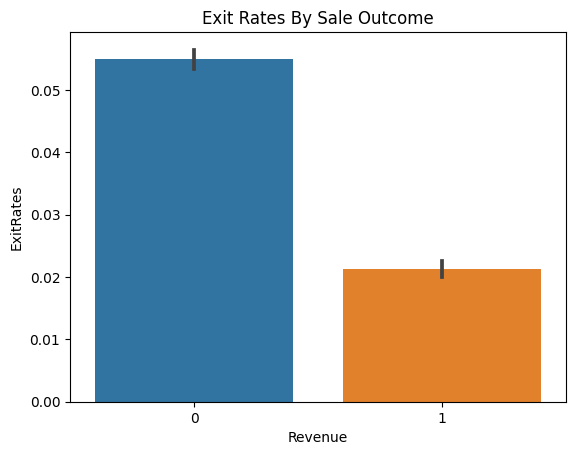

In [109]:
sns.barplot(data = df_train, x = "Revenue", y = 'ExitRates')
plt.title("Exit Rates By Sale Outcome");

* The distribution is not as skewed as bounce rates
* The mean exit rate is 0.05 and the median of 0.03
* Again, there are a few datapoints clustered around the 0.2 value
* None of the users with this exit rate made a purchase
* Higher exit rates are associated with people who do not buy and lower rates with those who buy

### Page Values

Number of pages before completing a transaction

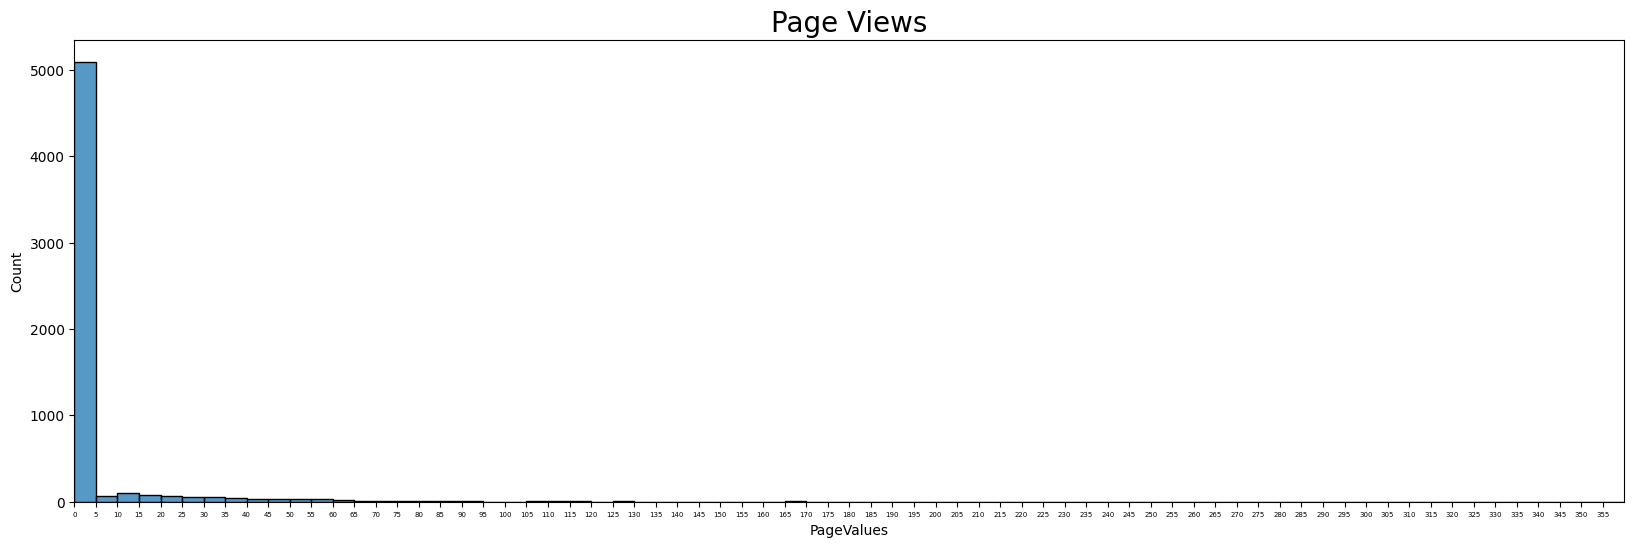

In [212]:
# Plot time spent per page
fig, ax = plt.subplots(figsize = (20,6))
sns.histplot(data = df_train, x = 'PageValues', bins = 80, binwidth = 5)
plt.title("Page Views", fontsize = 20)
plt.xlim(0,360)
plt.xticks(np.arange(0, 360,step=5), fontsize = 5);

* Mostly less than 5 page views
* Mean is 4.5 pages and median is 0

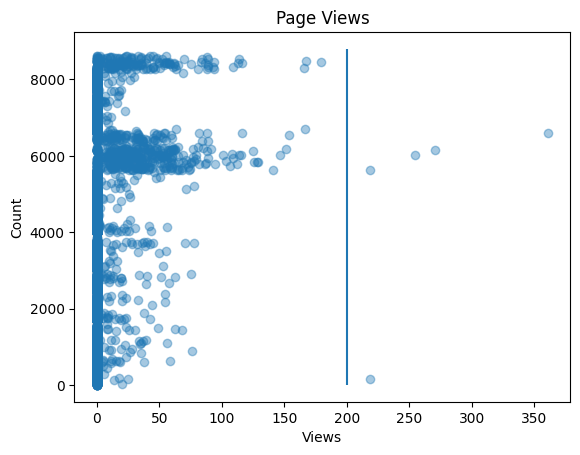

In [213]:
# Check for outliers - informational duration per page
plt.scatter(y = df_train.index,x = df_train['PageValues'], alpha = 0.4)
plt.title("Page Views")
plt.xlabel("Views")
plt.vlines(200,0,8800)
plt.ylabel("Count");

In [138]:
# Look at outliers above 200 page views
df_train[df_train['PageValues']>200]

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Administative_Duration/Page,Informational_Duration/Page,Product_Duration/Page
156,5210,2,123.75,0,0.0,21,938.333333,0.010000,0.016667,218.395192,...,1,1,3,2,Returning_Visitor,0,0,61.875,NaN,44.682540
5634,8875,1,67.50,0,0.0,12,592.250000,0.000000,0.018182,218.864910,...,1,1,5,3,New_Visitor,0,1,67.500,NaN,49.354167
6028,4403,4,47.50,0,0.0,16,331.333333,0.000000,0.010526,254.607158,...,2,5,1,2,New_Visitor,0,1,11.875,NaN,20.708333
6143,10527,0,0.00,0,0.0,7,432.000000,0.000000,0.014286,270.784693,...,2,4,1,8,New_Visitor,0,1,NaN,NaN,61.714286
6600,4923,0,0.00,0,0.0,28,1107.922619,0.014815,0.009877,226.677702,...,8,13,9,20,Other,0,1,NaN,NaN,39.568665
6603,7116,0,0.00,0,0.0,44,784.883333,0.000000,0.004762,360.953384,...,8,13,9,20,Other,0,1,NaN,NaN,17.838258


* There are some outlier values above 200 page views where users view many pages before making a purchase
* All but one does buy 
* The one that did not buy was a returning visitor whereas the buyers were categorised as new or other
* We will leave this in the data as there is some useful information contained in this pattern of users

In [146]:
# Look at the mean page values between buyers and non-buyers
df_train.groupby("Revenue")["PageValues"].mean()

Revenue
0     1.067698
1    31.269771
Name: PageValues, dtype: float64

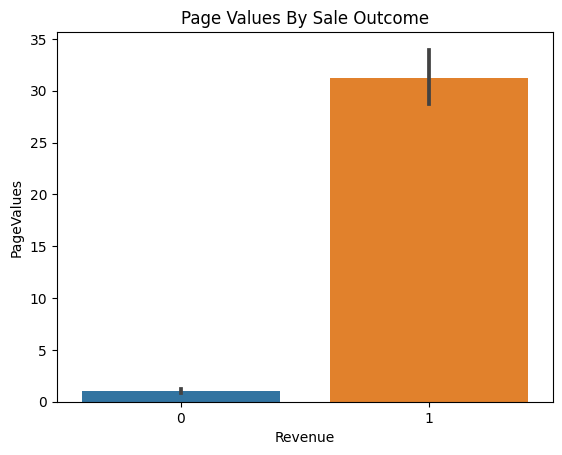

In [118]:
sns.barplot(data = df_train, x = "Revenue", y = 'PageValues')
plt.title("Page Values By Sale Outcome");

* Buyers have higher mean page values (views) than non-buyers as we might expect
* We would expect that where we have a lot of page views on the site, that there would be an associated large number of informational, administrative and product related page visits to accompany this and perhaps durations would also reflect this.

### Closeness to a Special Day

In [217]:
df_train['SpecialDay'].value_counts()

0.0    5161
0.6     193
0.8     167
0.4     111
0.2      87
1.0      71
Name: SpecialDay, dtype: int64

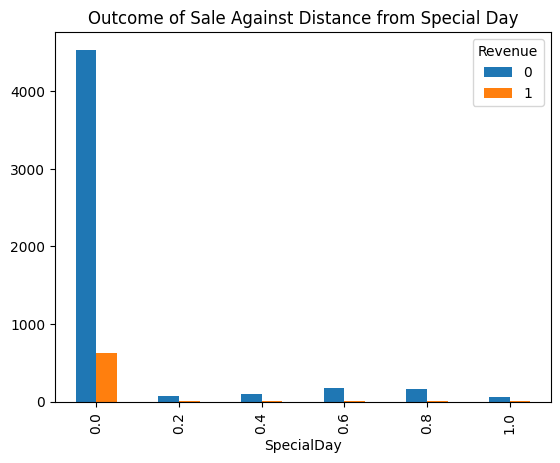

In [245]:
pd.crosstab(df_train["SpecialDay"], df_train["Revenue"]).plot.bar()
plt.title("Outcome of Sale Against Distance from Special Day");

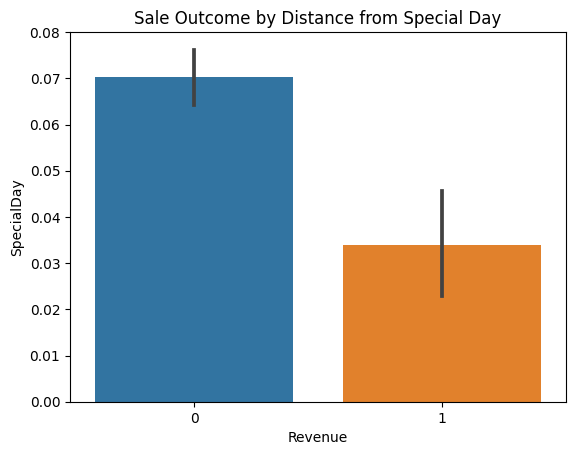

In [249]:
sns.barplot(data = df_train, x = "Revenue", y = 'SpecialDay')
plt.title("Sale Outcome by Distance from Special Day");

* It appears that if 1.0 indicates being most close to a special day and zero being further away
* Being further away from a special day is more likely to result in a sale
* The difference between the bars at each category of distance to special day suggests that this is an influencing factor for whether a sale is made

### Month (10 months Feb to Dec)

In [246]:
df_train['Month'].value_counts()

May     1656
Nov     1152
Mar      999
Dec      829
Oct      262
Sep      231
Jul      214
Aug      196
June     139
Feb      112
Name: Month, dtype: int64

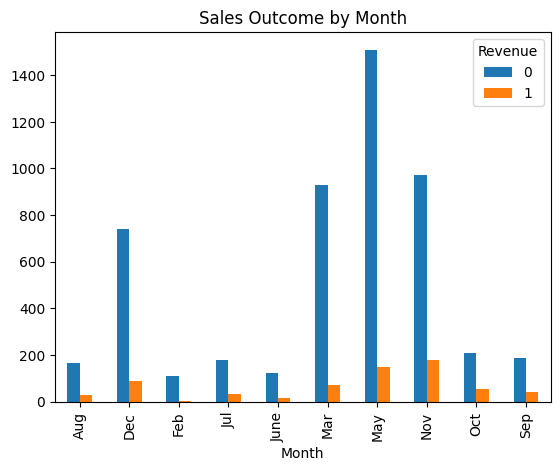

In [266]:
pd.crosstab(df_train['Month'], df_train['Revenue']).plot.bar()
plt.title("Sales Outcome by Month");

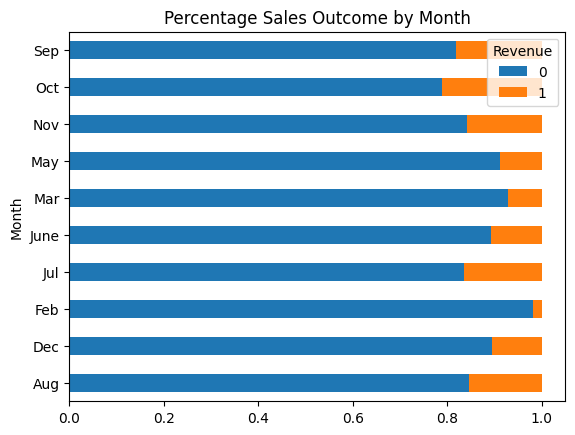

In [267]:
pd.crosstab(df_train["Month"], df_train["Revenue"],normalize = 'index').plot.barh(stacked = True)
plt.title("Percentage Sales Outcome by Month");

* Most visits and most sales are in May and November
* The least number of visits is in February
* Proportionally more visits result in a sale in October and July

### Operating System

In [268]:
df_train.columns

Index(['ID', 'Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'Administative_Duration/Page',
       'Informational_Duration/Page', 'Product_Duration/Page'],
      dtype='object')

In [269]:
df_train["OperatingSystems"].value_counts()

2    2876
1    1360
3    1279
4     213
8      47
6      10
7       3
5       2
Name: OperatingSystems, dtype: int64

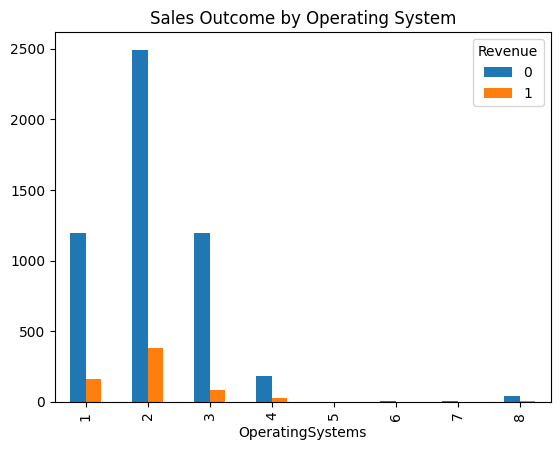

In [270]:
pd.crosstab(df_train['OperatingSystems'], df_train['Revenue']).plot.bar()
plt.title("Sales Outcome by Operating System");

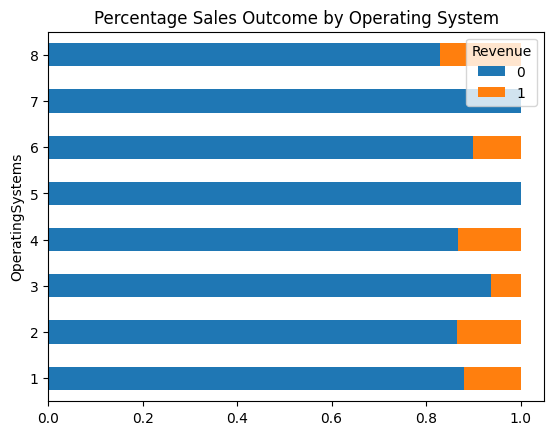

In [271]:
pd.crosstab(df_train["OperatingSystems"], df_train["Revenue"],normalize = 'index').plot.barh(stacked = True)
plt.title("Percentage Sales Outcome by Operating System");

* Most visitors have operating system 2
* Visitors with operating system 5 make no purchases
* Visitors with operating systems 2 and 8 make proportionately more purchases

### Browser

In [272]:
df_train["Browser"].value_counts()

2     3635
1     1271
4      324
5      211
8       84
10      76
6       63
3       53
13      37
7       31
12       3
11       2
Name: Browser, dtype: int64

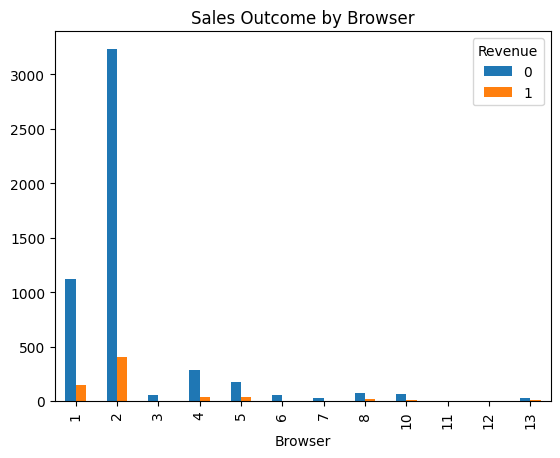

In [273]:
pd.crosstab(df_train['Browser'], df_train['Revenue']).plot.bar()
plt.title("Sales Outcome by Browser");

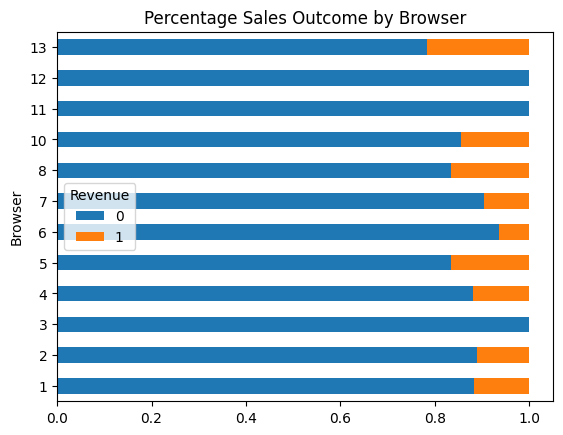

In [274]:
pd.crosstab(df_train["Browser"], df_train["Revenue"],normalize = 'index').plot.barh(stacked = True)
plt.title("Percentage Sales Outcome by Browser");

* Most visitors use browser type 2
* No purchases are made by visitors using browser types 3,11 and 12
* The largest proportion of sales is made by users with browser type 13

### Region

In [275]:
df_train["Region"].value_counts()

1    2240
3    1110
4     540
2     527
6     391
7     368
9     262
8     195
5     157
Name: Region, dtype: int64

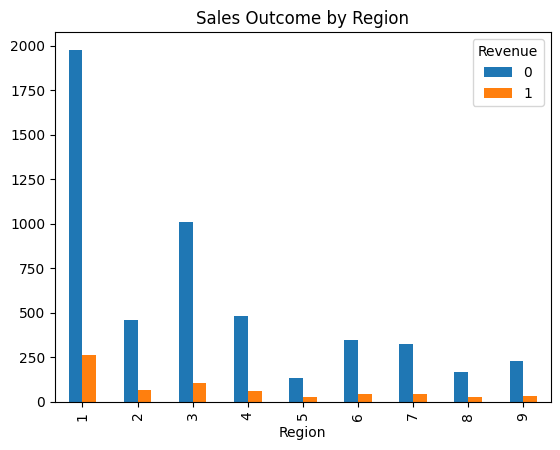

In [276]:
pd.crosstab(df_train['Region'], df_train['Revenue']).plot.bar()
plt.title("Sales Outcome by Region");

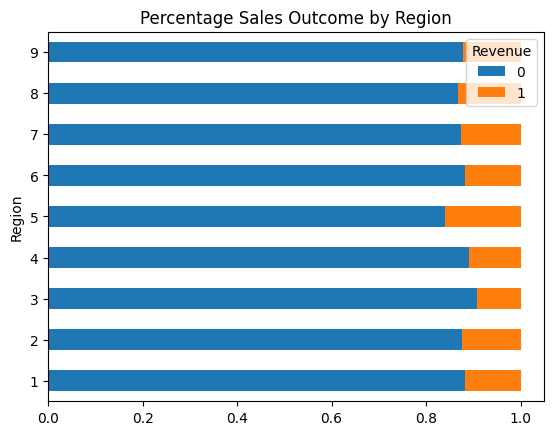

In [277]:
pd.crosstab(df_train["Region"], df_train["Revenue"],normalize = 'index').plot.barh(stacked = True)
plt.title("Percentage Sales Outcome by Region");

* Most visitors are from region 1
* The largest percentage of sales for a region is from region 5 and the least from region 3

### Traffic Type

In [279]:
df_train["TrafficType"].value_counts()

2     1658
1     1111
3     1070
4      513
13     355
6      207
10     207
8      169
5      155
11     143
20     116
9       26
15      21
7       17
19       8
14       7
18       5
16       1
17       1
Name: TrafficType, dtype: int64

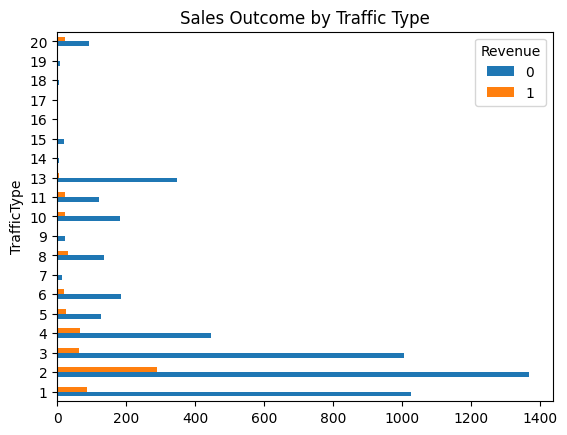

In [280]:
pd.crosstab(df_train['TrafficType'], df_train['Revenue']).plot.barh()
plt.title("Sales Outcome by Traffic Type");

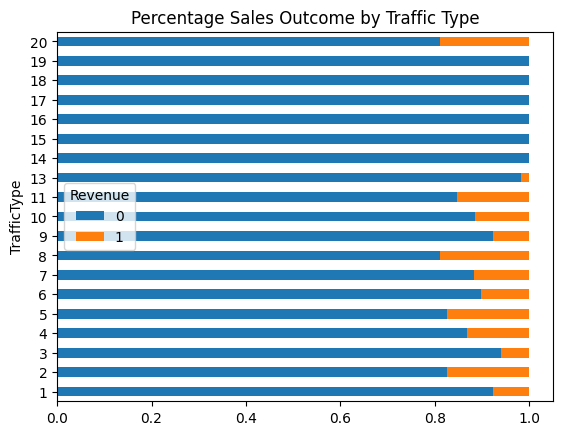

In [281]:
pd.crosstab(df_train["TrafficType"], df_train["Revenue"],normalize = 'index').plot.barh(stacked = True)
plt.title("Percentage Sales Outcome by Traffic Type");

* Most visits are represented by traffic type 2
* The highest percentage of sales is generated by traffic types 20, 8,5 and 2

### Visitor Type

In [282]:
df_train["VisitorType"].value_counts()

Returning_Visitor    4729
New_Visitor          1011
Other                  50
Name: VisitorType, dtype: int64

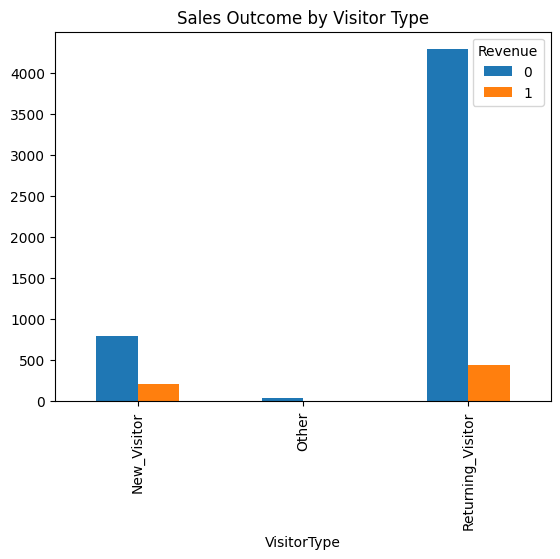

In [283]:
pd.crosstab(df_train['VisitorType'], df_train['Revenue']).plot.bar()
plt.title("Sales Outcome by Visitor Type");

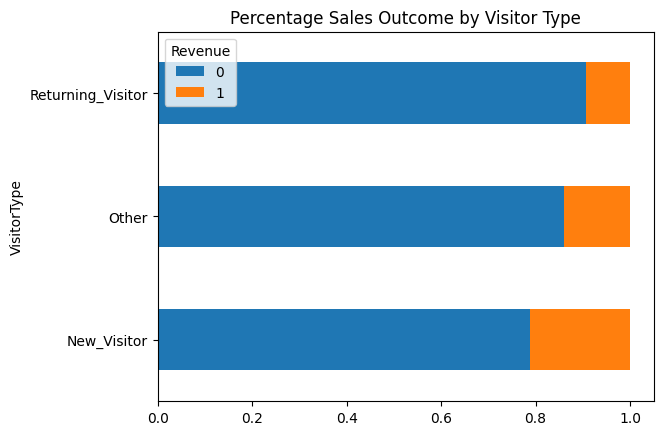

In [284]:
pd.crosstab(df_train["VisitorType"], df_train["Revenue"],normalize = 'index').plot.barh(stacked = True)
plt.title("Percentage Sales Outcome by Visitor Type");

* Returning visitors make up the bulk of visits
* Proportionately more sales are generated by new visitors

### Weekend

In [285]:
df_train["Weekend"].value_counts()

0    4450
1    1340
Name: Weekend, dtype: int64

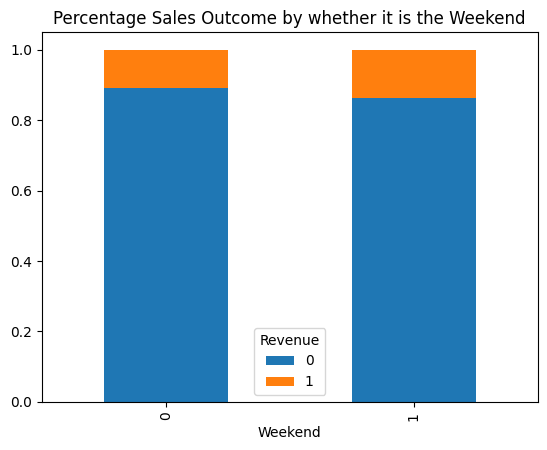

In [289]:
pd.crosstab(df_train["Weekend"], df_train["Revenue"],normalize = 'index').plot.bar(stacked = True)
plt.title("Percentage Sales Outcome by whether it is the Weekend");

* Sales are more likely on the weekend

## Associations, Relationships and Correlations

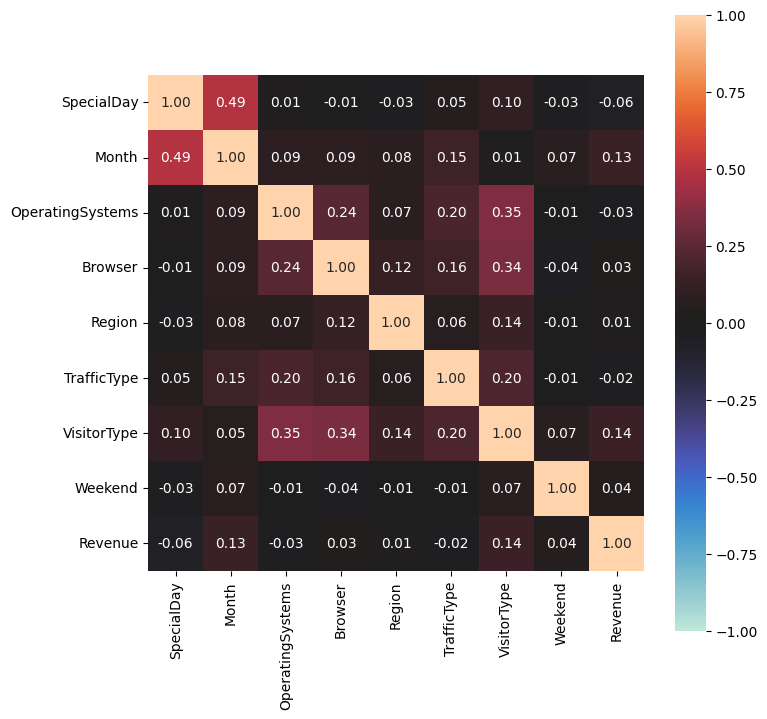

In [291]:
# Relationships between categorical revenue and categorical features
associations(df_train[['SpecialDay','Month','OperatingSystems','Browser',
               'Region','TrafficType','VisitorType','Weekend','Revenue']], nom_nom_assoc='theil', figsize = (8,8));

* Revenue is not strongly related to any of the categorical features
* The strongest relationship is with the month of visit and with the type of visitor (new, returning or other)
* There are negative relationships with distance to special day, type of operating system and traffic type
* There are some relationships between other features such as month and distance from a special day, operating system and browser and visitor type and interestingly browser type and visitor type

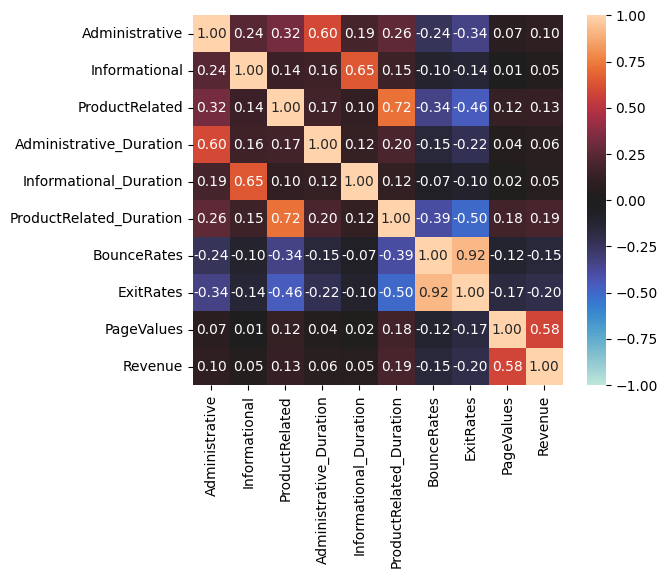

In [292]:
# Relationship between categorical target Revenue and nominal features
associations(df_train[['Administrative','Informational','ProductRelated','Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates',
               'PageValues','Revenue']]);

* The strongest relationship between whether a sale is made is with the page values
* There are negative relationships with bounce and exit rates as we would expect
* There is some weak relationships with the number of administrative and product related pages visited and the duration of time spent on product related pages
* The relationship with informational page views and the amount of time spent on administrative and information pages is very weakly positive
* As we might expect bounce rate and exit rate are highly positively related and bounce rates and exit rates are negatively related to the page duration features
* Number of page views and durations for each of the types of pages are highly correlated - again as we would expect
* There are a number of other relationships in the heatmap that can be explored

In [ ]:
pd.to_csv("C:/Users/imoge/Projects/Datasets/CustomerPredictionTrain2.csv",index = False)